In [1]:
import numpy as np
import cv2
import pandas as pd
import PIL
import utm
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
import os

In [2]:
def start_end_point(lat, lon):
    start = [lon - 55, lat + 50]
    end = [lon + 55, lat - 50]
    if start[0] > 180:
        start[0] = start[0] - 360
    elif start[0] < -180:
        start[0] = start[0] + 360
    if start[1] > 80:
        start[1] = start[1] - 160
    elif start[1] < - 80:
        start[1] = start[1] + 160

    if end[0] > 180:
        end[0] = end[0] - 360
    elif end[0] < -180:
        end[0] = end[0] + 360
    if end[1] > 80:
        end[1] = end[1] - 160
    elif end[1] < - 80:
        end[1] = end[1] + 160

    return(start, end)

def conv_func(data): # dont do this, ever, this is very bad. Will need to rewrite it for sure. NEED TO RE DO THIS FOR SURE

    starting_points = []
    ending_points = []

    for i in range(len(data)):
        start, end = start_end_point(data.iloc[i]['latitude'], data.iloc[i]['longitude'])
        
        start_utm = utm.from_latlon(start[1], start[0])
        starting_points.append(start_utm[2:])
        
        end_utm = utm.from_latlon(end[1], end[0])
        ending_points.append(end_utm[2:])

    starting_zones = pd.DataFrame(starting_points)
    ending_zones = pd.DataFrame(ending_points)

    coords = pd.concat([data, starting_zones, ending_zones],axis=1)
    coords.columns = ['latitude', 'longitude', 's_zone', 's_band', 'e_zone', 'e_band']

    coords['ns_band'] = [ ord(x) - 64 for x in coords.s_band ]
    coords['ne_band'] = [ ord(x) - 64 for x in coords.e_band ]

    bins_zone = [i*15 for i in range(0,5)]
    labels_zone = [i for i in range(1,5)]

    bins_band = [i*6 for i in range(0,5)]
    labels_band = [i for i in range(1,5)]

    # Binning results
    coords['s_bin_zone'] = pd.DataFrame(pd.cut(coords['s_zone'], bins=bins_zone, labels=labels_zone))
    coords['s_bin_band'] = pd.DataFrame(pd.cut(coords['ns_band'], bins=bins_band, labels=labels_band))
    coords['e_bin_zone'] = pd.DataFrame(pd.cut(coords['e_zone'], bins=bins_zone, labels=labels_zone))
    coords['e_bin_band'] = pd.DataFrame(pd.cut(coords['ne_band'], bins=bins_band, labels=labels_band))

    return coords

Currently, the code below only makes dataset for a single video, but thats only because If we made it for all videos, it would take a long time to process. Figuring out a nice way to store the data is work in progress

(commented out, because we now load the processed dataset)

In [27]:
subject_list = [f for f in os.listdir('./data/head_tracking_data') if 'Subject' in f] # list of all subjects
video_list = [f for f in os.listdir('./data/video_files') if 'mp4' in f] # list of all videos


# videos = {} # each video will contain all subjects

# frames_per_segment = 30
# # video_id = video_list[19]
# for video_id in video_list:  # << thats the part that did for all videos
#     subjects = {} # for each subject, we store segments which are in seperate lists

#     for subject_id in subject_list:
#         tmp_data = pd.read_fwf('data/head_tracking_data/'+ subject_id + '/' + video_id.split('.mp4')[0] + '.txt', header=None)
#         tmp_data.columns = ['latitude', 'longitude']
#         processed_data = conv_func(tmp_data)
#         n_segments = int(len(tmp_data)/frames_per_segment) # ofc its not entirely coorect yet, it approximates how many segments\
#         segments = []

#         for seg in range(n_segments):
#             start = frames_per_segment * seg
#             end = frames_per_segment * (seg+1)
#             segments.append(processed_data[start:end])

#         subjects[subject_id] = segments

#     videos[video_id] = subjects

In [30]:
# print(videos.keys())
# print(videos[next(iter(videos))].keys())

In [29]:
# subject_list = [f for f in os.listdir('./data/head_tracking_data') if 'Subject' in f] # list of all subjects
# # video_list = [f for f in os.listdir('./data/video_files') if 'mp4' in f] # list of all videos

# # subject_list = ['Subject_1']
# full_data = {}
# for video in video_list:
#     many_users = {}
#     # union of unique tiles within the segment, so we can connect the segments in graph
#     for user in subject_list:
#         single_user = pd.DataFrame()
#         for segment in videos[video][user]:
            
#             tmp_segment = segment.reset_index(drop=True)
#             lst = []
#             for i in range(len(tmp_segment)):
#                 lst.append(((tmp_segment.iloc[i]['s_bin_zone'], tmp_segment.iloc[i]['s_bin_band']), (tmp_segment.iloc[i]['e_bin_zone'], tmp_segment.iloc[i]['e_bin_band'])))

#             df = pd.DataFrame(lst)
#             df.columns = ['s', 'e']

#             uniq_correct = df.groupby(['s','e']).size().reset_index().rename(columns={0:'count'})
#             uniq_correct = uniq_correct.sort_values(by=['s', 'e'])

#             single_user = single_user.append({'unique': str(uniq_correct[['s','e']].values)},ignore_index=True)

#         many_users[user] = single_user
        
#     full_data[video] = many_users
        

In [24]:
import pickle
# def save_obj(obj, name ):
#     with open('obj/'+ name + '.pkl', 'wb') as f:
#         pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# save_obj(full_data, 'data')

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

full_data = load_obj('data')

In [26]:
test.keys()

dict_keys(['A380.mp4', 'AcerPredator.mp4', 'AirShow.mp4', 'Antarctic.mp4', 'BFG.mp4', 'BlueWorld.mp4', 'BTSRun.mp4', 'CandyCarnival.mp4', 'CMLauncher.mp4', 'Cryogenian.mp4', 'CS.mp4', 'Dota2.mp4', 'DrivingInAlps.mp4', 'Dubai.mp4', 'Egypt.mp4', 'F5Fighter.mp4', 'GalaxyOnFire.mp4', 'Gliding.mp4', 'Graffiti.mp4', 'Help.mp4', 'HondaF1.mp4', 'IRobot.mp4', 'KasabianLive.mp4', 'LetsNotBeAloneTonight.mp4', 'LOL.mp4', 'LoopUniverse.mp4', 'MC.mp4', 'MercedesBenz.mp4', 'Parachuting.mp4', 'Pokemon.mp4', 'Predator.mp4', 'ProjectSoul.mp4', 'Rally.mp4', 'RingMan.mp4', 'RioOlympics.mp4', 'RollerCoaster.mp4', 'Skiing.mp4', 'StarryPolar.mp4', 'StarWars.mp4', 'Supercar.mp4', 'SuperMario64.mp4', 'Surfing.mp4', 'Symphony.mp4', 'Terminator.mp4', 'VRBasketball.mp4', 'WaitingForLove.mp4', 'Waterskiing.mp4', 'WesternSichuan.mp4'])

In [31]:
# need to figure out this still.
G = nx.DiGraph()

for subj in subject_list:
    for i in range(len(full_data['Help.mp4'][subj])-1):
        
        # connect previous set of [top left zone, bottom right zone] to current [top left zone, bottom right zone]
        G.add_edge((str(full_data['Help.mp4'][subj].iloc[i]), i), (str(full_data['Help.mp4'][subj].iloc[i+1]), i+1))
        

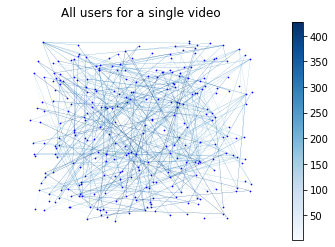

In [32]:
pos = nx.layout.random_layout(G)

node_sizes = 0.5
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [i / M  for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=0.3,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    # connectionstyle="arc3,rad=0.5",
    width=0.2,
)
# set alpha value for each edge
# for i in range(M):
#     edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)
ax = plt.gca()
ax.set_axis_off()
plt.title('All users for a single video')
plt.show()
